# DS2022 - IBM Exercise 1

## Task:

Implement KNN by hand for just 2 dimensions with normalization.

## Solution:

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# create some test data
data = np.random.rand(100,3)
data[:,2][data[:,2] < 0.5] = 0
data[:,2][data[:,2] >= 0.5] = 1
x = data[:,0]
y = data[:,1]
z = data[:,2]

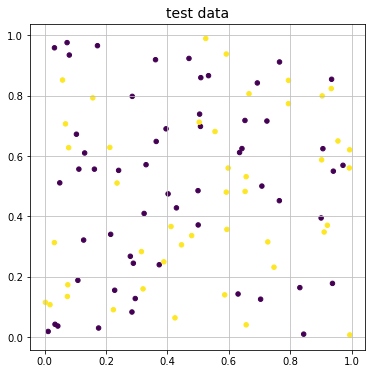

In [3]:
# plot test data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("test data",fontsize=14)
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(x,y,s=20,c=z, marker = 'o');
plt.show()

In [4]:
# normalize your data in another table
def normalize(data):
    return data/np.linalg.norm(data)

# code a simple euclid distance function
def e_distance(a, b):
    return sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

# take a point and calculate the distance to all points
def dist_list(data, point):
    dist_list = []
    for row in data:
        # print(e_distance((row[0], row[1]), (0.5, 0.5)))
        dist_list.append((e_distance((row[0], row[1]), point), row))
    return dist_list

# You take the list from above and sort it
def sorted_list(dist_list):
    sorted_list = []
    sorted_list = sorted(dist_list)
    return sorted_list

# aggregate by target variable
def k_list(sorted_list, k):
    k_list = []
    k_list = sorted_list[0:k]
    return k_list

# take the max to determine the target class
def predict(learn_set, point, k):
    f_list = k_list(sorted_list(dist_list(learn_set, point)), k)
    n_list = [lis[1] for lis in f_list]
    l_list = [lis[2] for lis in n_list]
    return int(max(set(l_list), key = l_list.count))
    


In [9]:
# test run #1 (predicts classes 0/1)

test_value = (0.5, 0.5)
k_param = 5
predict(data, test_value, k_param)

0

In [6]:
# test run #2 (predicts classes 0/1)

test_value = (0.7, 0.9)
k_param = 5
predict(data, test_value, k_param)

1

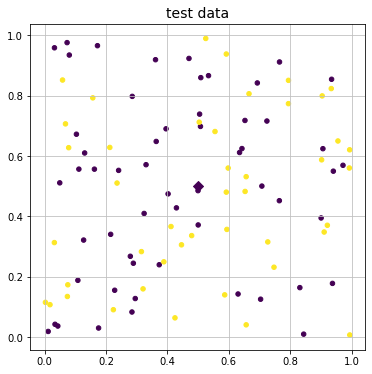

In [10]:
# plot test data

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("test data",fontsize=14)
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(x,y,s=20,c=z, marker = 'o')
ax.scatter(test_value[0],test_value[1],s=50,c=predict(data, test_value, k_param), marker = 'D');
plt.show()